In [1]:
import torch 
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
os.chdir("../models")
from common_utils import CustomTransform

In [2]:
# get mean rgb of training data
train_dataset = datasets.Flowers102(root='../data', split='train', download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
mean = torch.zeros(3)
for i, (x, y) in enumerate(train_loader):
    mean += x.mean(dim=(0,2,3))
mean /= len(train_dataset)
print(mean)

tensor([0.4330, 0.3819, 0.2964])


In [3]:
transform = CustomTransform(mean)

train_dataset = datasets.Flowers102(root='../data', split='test', download=True, transform=transform) 
val_dataset = datasets.Flowers102(root='../data', split='val', download=True, transform=transform) 
test_dataset = datasets.Flowers102(root='../data', split='train', download=True, transform=transform) 
# NOTE: Due to a bug with the Flowers102 dataset, the train and test splits are swapped

In [4]:
len(train_dataset), len(val_dataset), len(test_dataset)

(6149, 1020, 1020)

In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
# labels are already loaded inside the dataset
for i, (inputs, labels) in enumerate(train_dataloader):
    print("Batch", i)
    print("Labels:", labels)
    break

Batch 0
Labels: tensor([93, 69, 49,  2, 80, 86, 47, 29, 33, 97, 45, 17, 88, 21, 31, 50, 22, 67,
        50, 45, 64, 55, 25, 69, 43, 87, 31, 23, 87, 30, 33, 30])


Let's visualise the convolution layer outputs

torch.Size([32, 3, 100, 100])


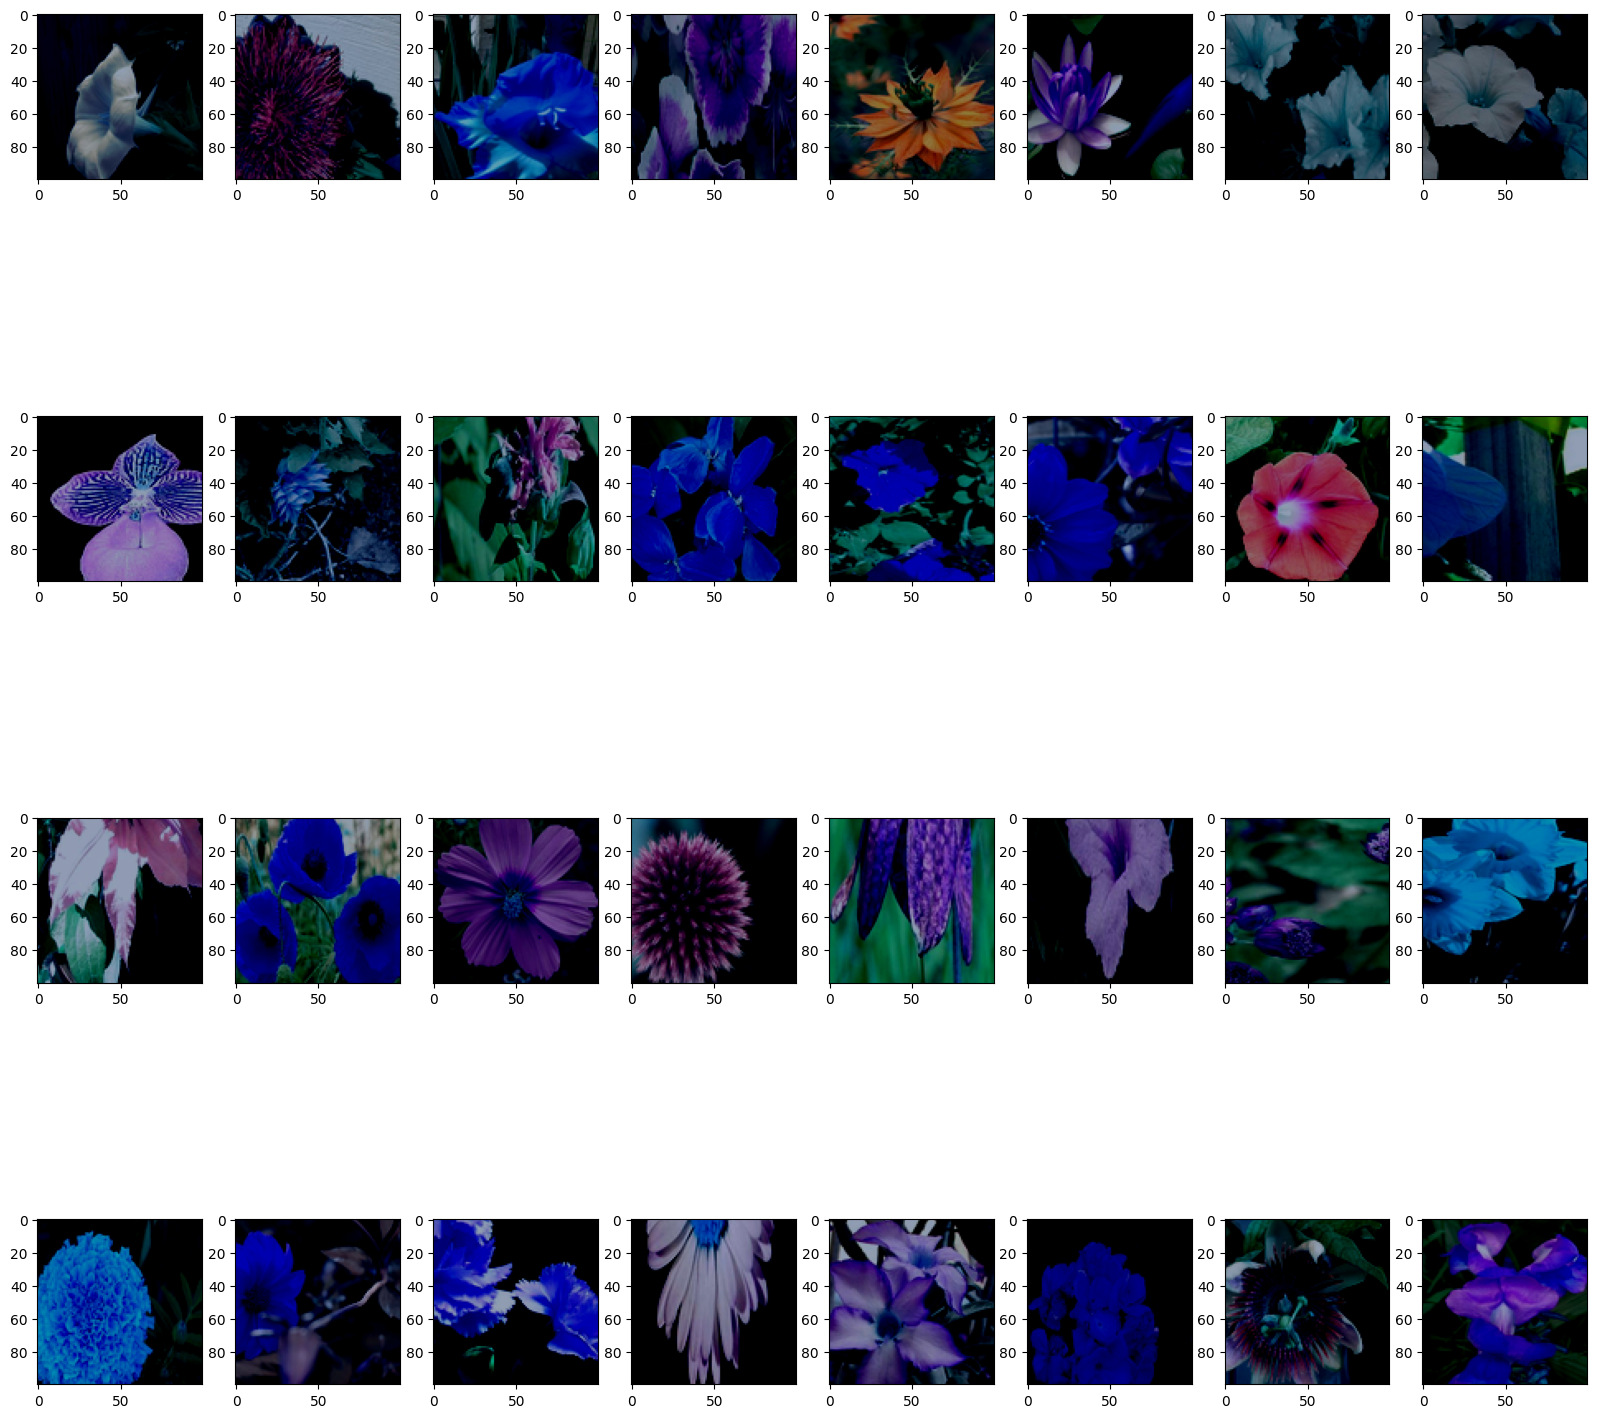

In [7]:
import os
os.chdir("../models")
from model import CustomCNN
import matplotlib.pyplot as plt

# Select random sample
seed = 1
torch.manual_seed(seed)
images, labels = next(iter(train_dataloader))
print(images.shape)

fig = plt.figure(figsize=(20, 20))

# plot all 32 images in the batch
for i in range(32):
    # Transpose the tensor dimensions to (height, width, channels)
    img = images[i].permute(1, 2, 0).numpy()

    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(img)

plt.show()

In [8]:
model = CustomCNN()
conv1, p1, conv2, p2, conv3, p3, conv4, conv5, p5, _ = model(images)
print(conv1.shape, p1.shape, conv2.shape, p2.shape, conv3.shape, p3.shape, conv4.shape, conv5.shape, p5.shape)

torch.Size([32, 64, 100, 100]) torch.Size([32, 64, 49, 49]) torch.Size([32, 128, 49, 49]) torch.Size([32, 128, 24, 24]) torch.Size([32, 256, 24, 24]) torch.Size([32, 256, 11, 11]) torch.Size([32, 512, 11, 11]) torch.Size([32, 512, 11, 11]) torch.Size([32, 512, 5, 5])


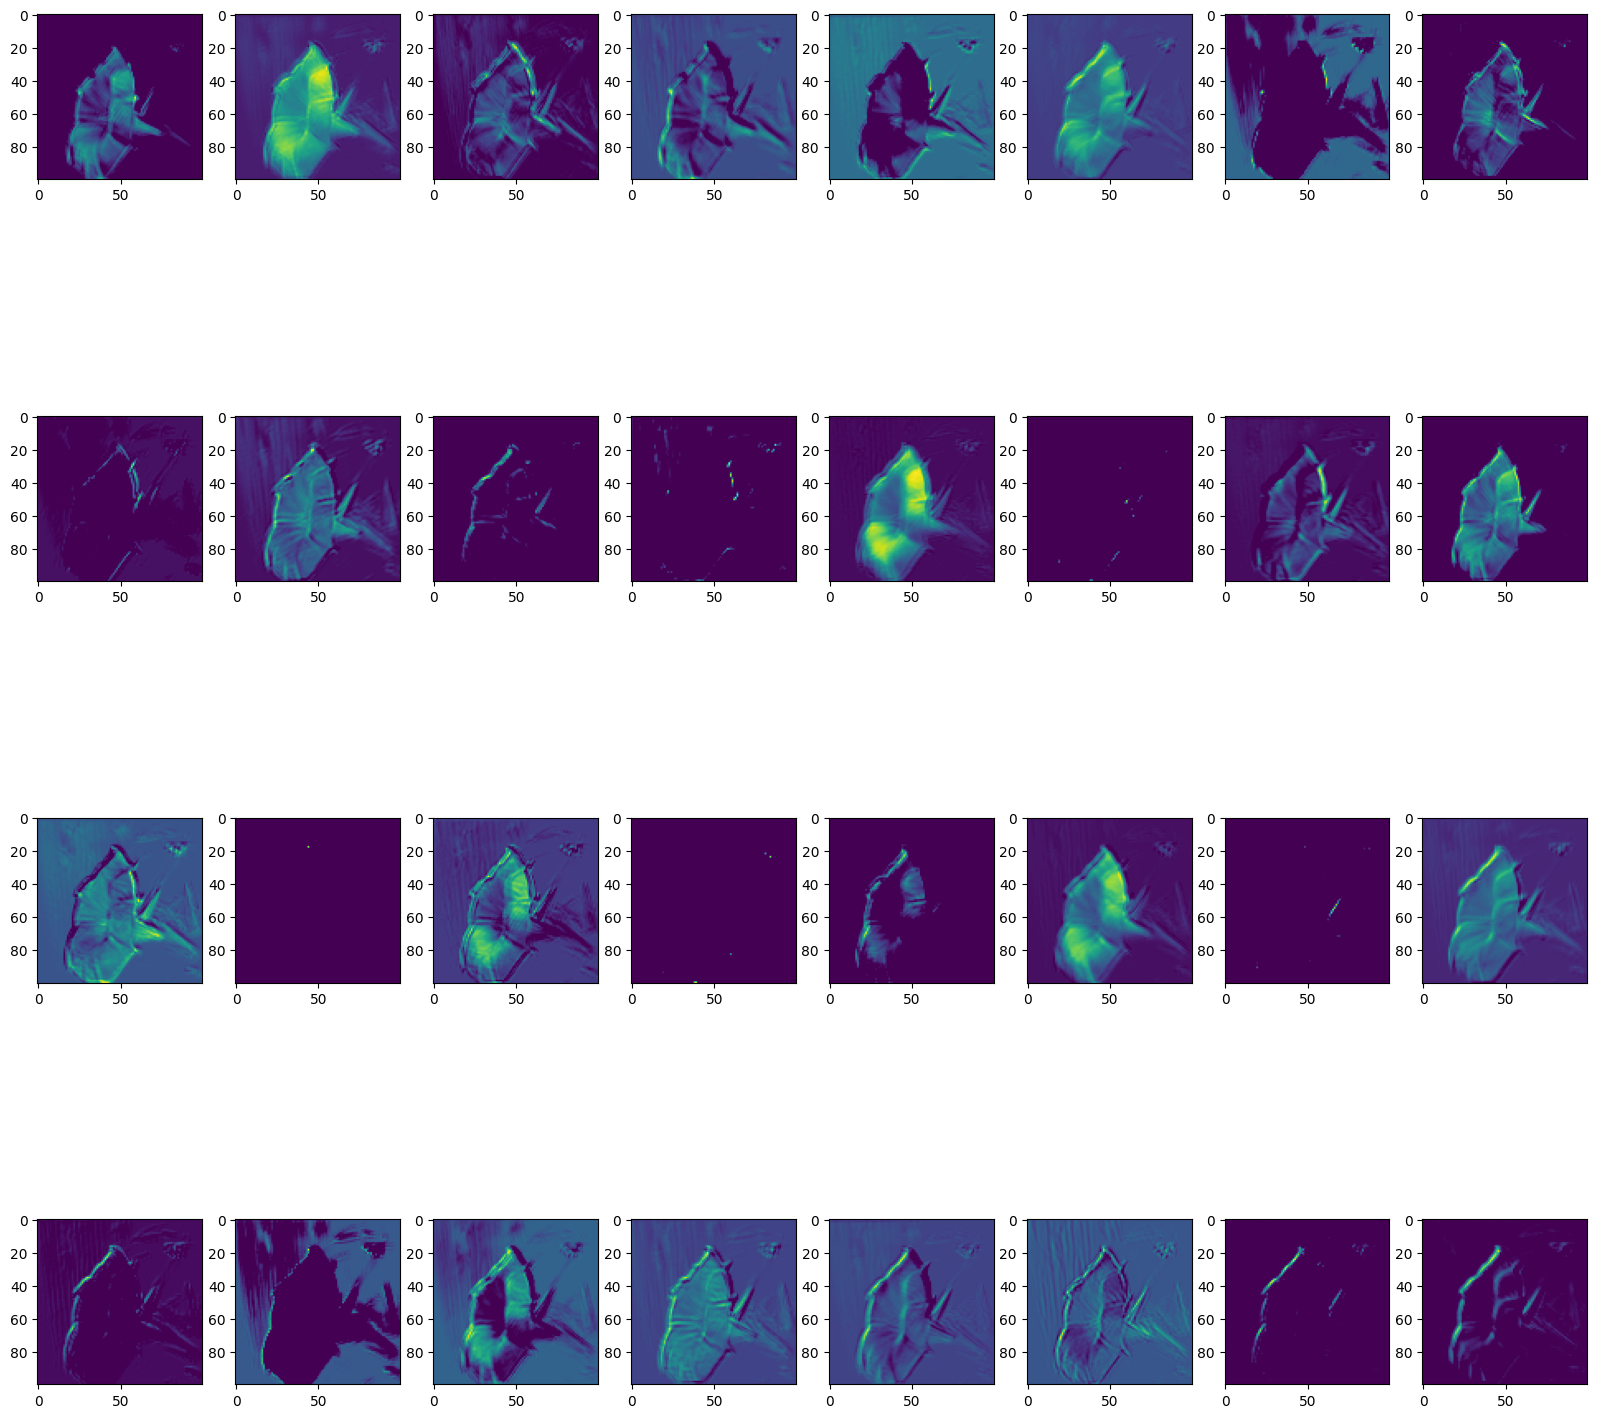

In [9]:
# plot all 32 feature maps for the first convolutional layer
fig = plt.figure(figsize=(20, 20))
for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(conv1[0, i].detach().numpy())
plt.show()

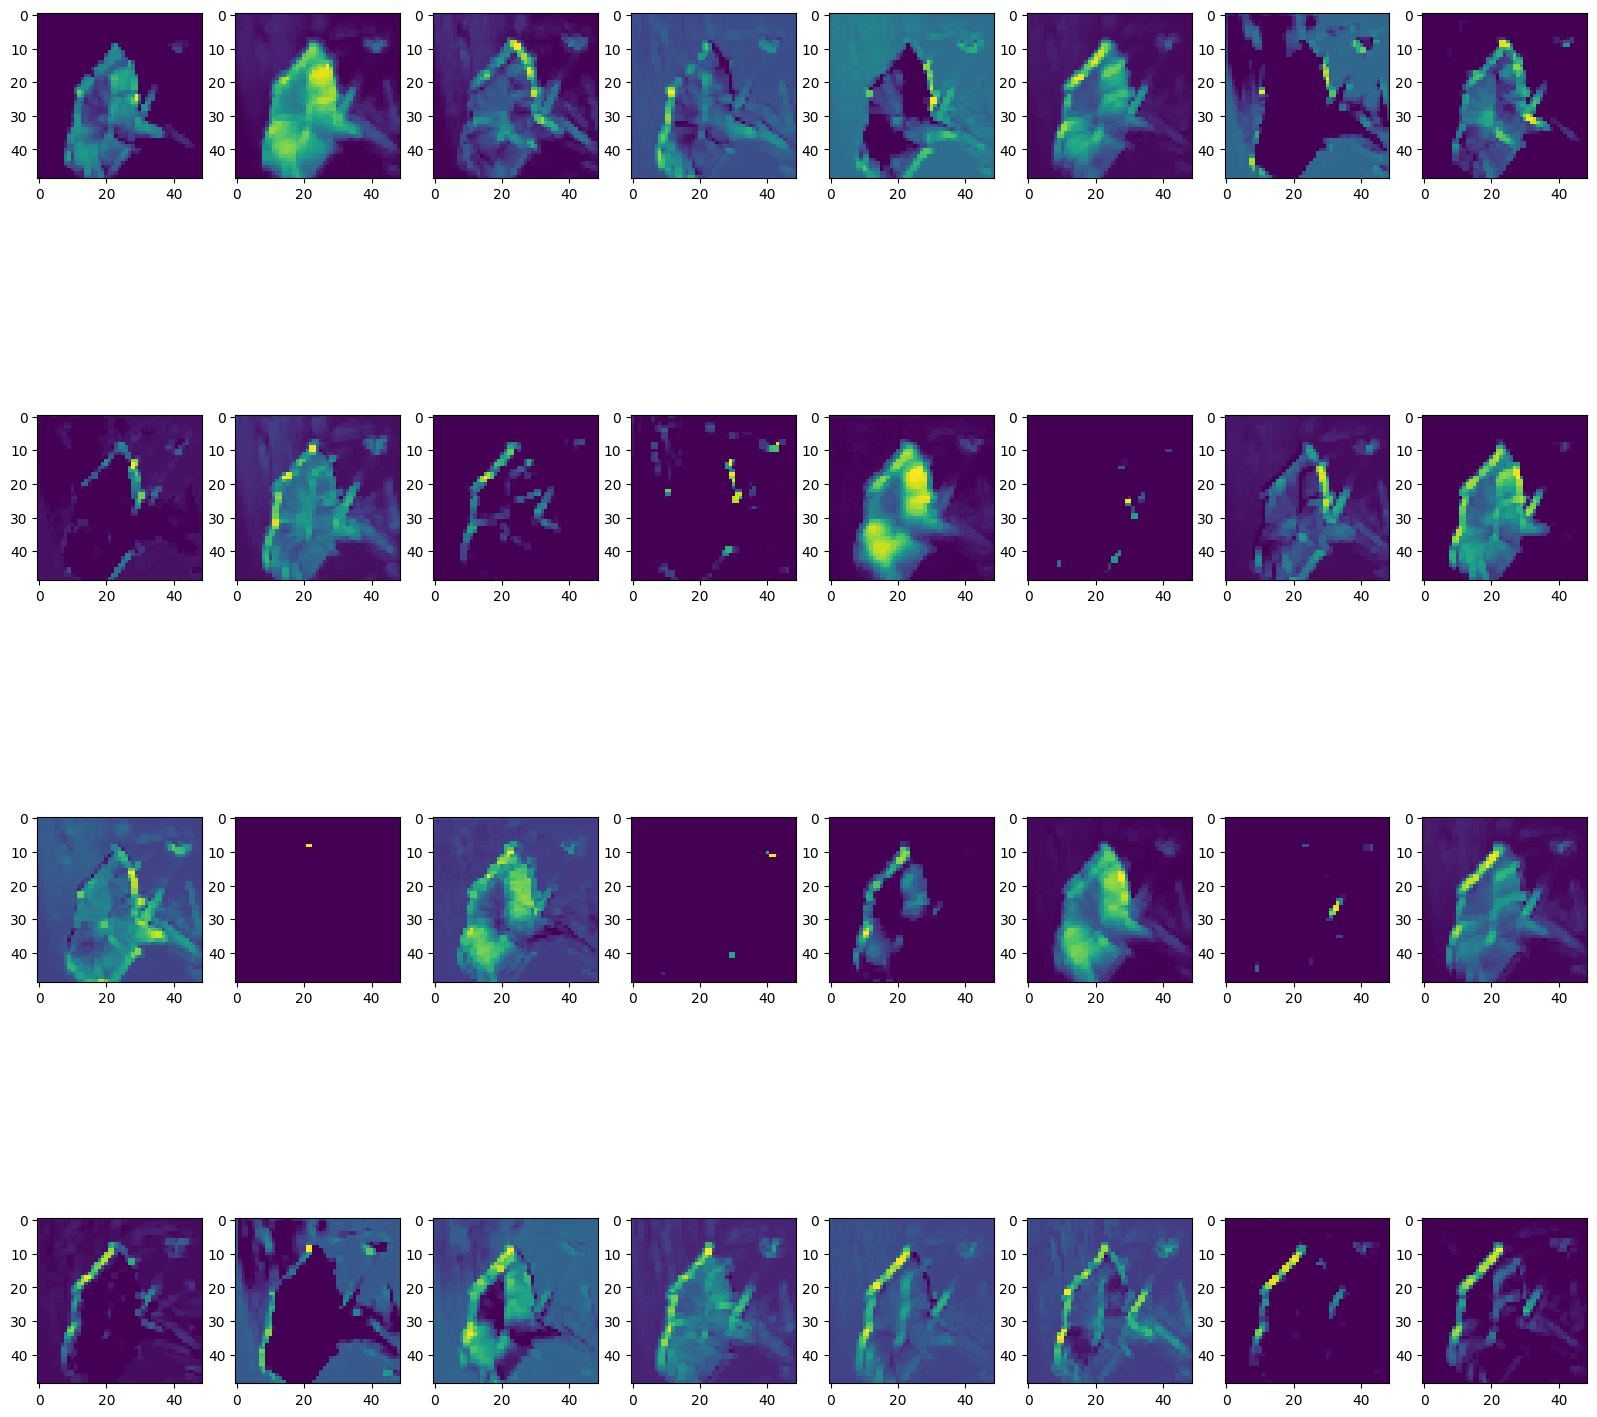

In [10]:
# plot all 32 pooled feature maps for the first convolutional layer
fig = plt.figure(figsize=(20, 20))
for i in range(32):
    ax = fig.add_subplot(4, 8, i+1)
    ax.imshow(p1[0, i].detach().numpy())
plt.show()